## Time series analyis

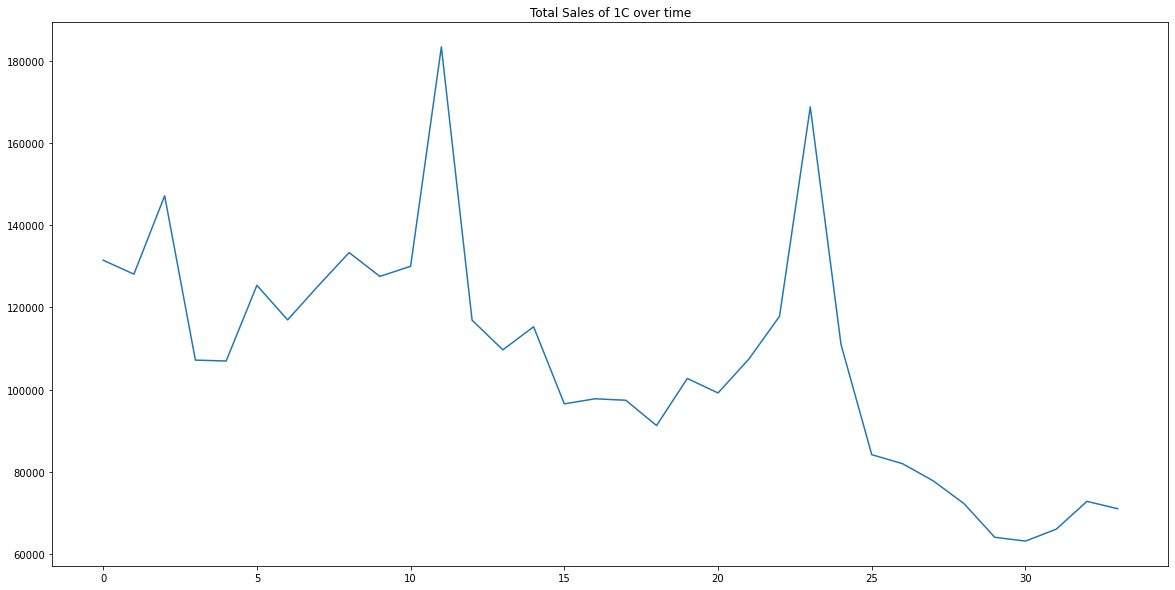

In [3]:
# read train
import pandas as pd
import matplotlib.pyplot as plt
train = pd.read_csv('../Data/sales_train.csv')
# single time series on whole data
data=train.groupby(["date_block_num"])["item_cnt_day"].sum()
plt.figure(figsize=(20,10))
plt.title('Total Sales of 1C over time')
plt.plot(data);

<ipython-input-6-97611ffcdbf3>:3: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  mulmodel = sm.tsa.seasonal_decompose(data.values,freq=12,model="multiplicative")
<ipython-input-6-97611ffcdbf3>:6: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  addmodel = sm.tsa.seasonal_decompose(data.values,freq=12,model="additive")


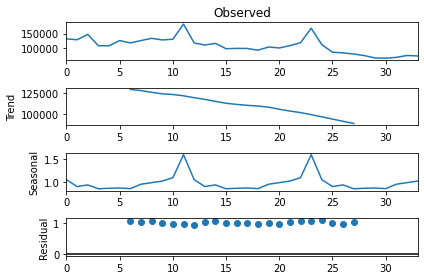

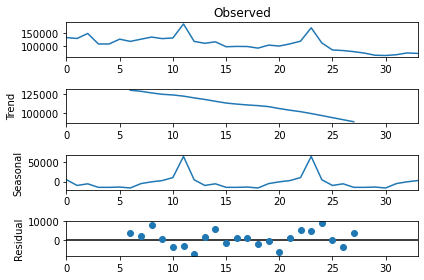

In [6]:
import statsmodels.api as sm
# multiplicative model
mulmodel = sm.tsa.seasonal_decompose(data.values,freq=12,model="multiplicative")
plot = mulmodel.plot()



<ipython-input-7-0c9efb8bacc1>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  addmodel = sm.tsa.seasonal_decompose(data.values,freq=12,model="additive")


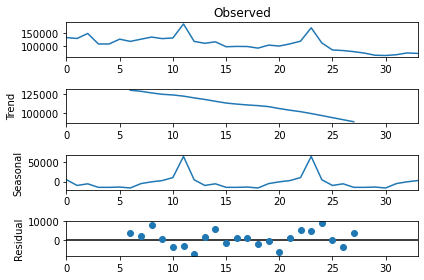

In [7]:
# additive model
addmodel = sm.tsa.seasonal_decompose(data.values,freq=12,model="additive")
plot = addmodel.plot()


In [ ]:
# prophet model (default additive)
# prophet doesn't require us to find the order, seasonality but figures it out on its own

prophetmodel = train.groupby(["date",'shop_id'])["item_cnt_day"].sum()
# to make single series
prophetmodel = prophetmodel.unstack(level=1)
# removing nan
prophetmodel = prophetmodel.fillna(0)
prophetmodel = prophetmodel.resample("M").sum()